In [3]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ### 원소의 절댓값 연산

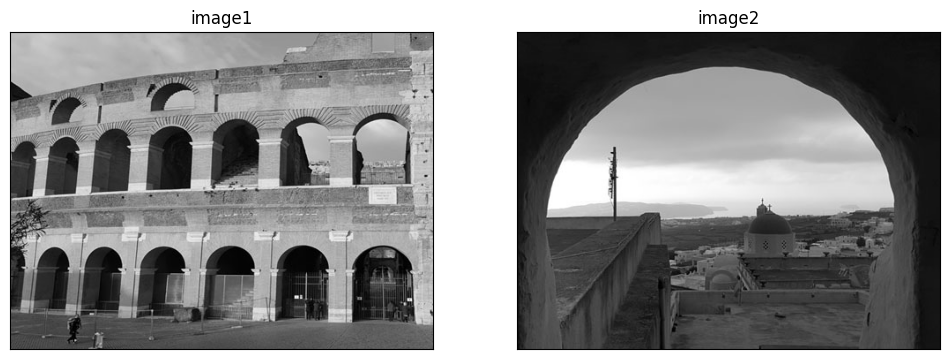

In [9]:
image1 = cv2.imread("./images/chap05/abs_test1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("./images/chap05/abs_test2.jpg", cv2.IMREAD_GRAYSCALE)

show_images({"image1": image1, "image2": image2}, 12)

<br><br>

- ### 차분 연산 (subtract)
    - #### uint8 array는 (0~255)만 저장 가능하므로 차이가 음수인 경우 0으로 처리됨
        - #### 이미지 전체적으로 어두워짐

image1: 
[[151 152 159]
 [163 162 166]
 [152 144 151]
 [127 124 143]
 [172 180 181]
 [169 174 170]
 [153 155 151]]
image2: 
[[169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]]
sub_image: 
[[ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 3 11 12]
 [ 0  5  1]
 [ 0  0  0]]


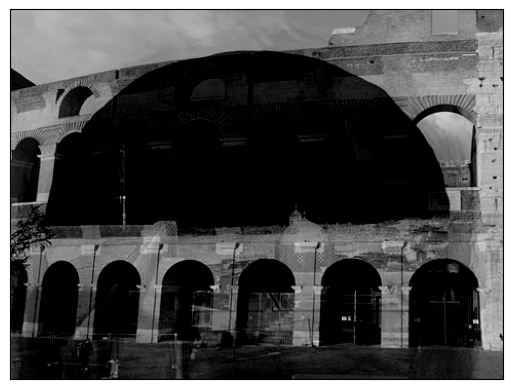

In [21]:
x, y, w, h = (100, 150, 7, 3)

print("image1: ")
print(image1[x:x+w, y:y+h])
print("image2: ")
print(image2[x:x+w, y:y+h])

sub_image = cv2.subtract(image1, image2)
print("sub_image: ")
print(sub_image[x:x+w, y:y+h])
show_rgb_image(sub_image)

<br><br>

- ### 차분 절댓값 연산
    - #### cv2.absdiff(image1, image2)
    - #### cv2.subtract(image1, image2) -> np.absolute

image1: 
[[151 152 159]
 [163 162 166]
 [152 144 151]
 [127 124 143]
 [172 180 181]
 [169 174 170]
 [153 155 151]]
image2: 
[[169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]
 [169 169 169]]
abs_dif2: 
[[18 17 10]
 [ 6  7  3]
 [17 25 18]
 [42 45 26]
 [ 3 11 12]
 [ 0  5  1]
 [16 14 18]]


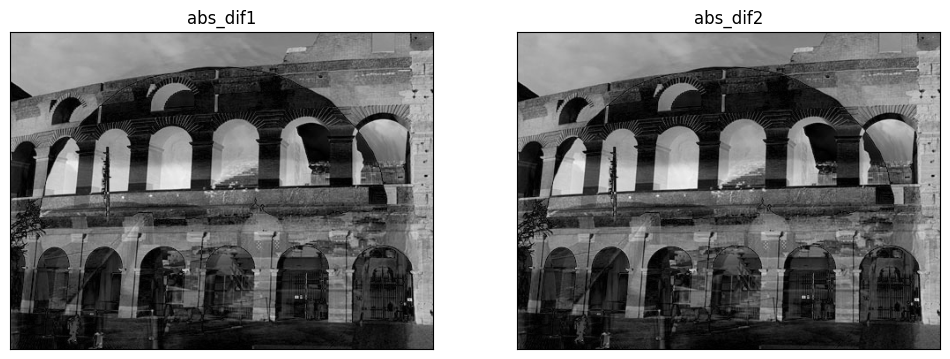

In [11]:
# 음수값을 저장하기 위해 array의 data-type int16으로 변경
int16_image1 = image1.astype(dtype='int16')
int16_image2 = np.int16(image2)
abs_dif1 = np.absolute(cv2.subtract(int16_image1, int16_image2)).astype(dtype="uint8")

abs_dif2 = cv2.absdiff(image1, image2)

x, y, w, h = (100, 150, 7, 3)
print("image1: ")
print(image1[x:x+w, y:y+h])
print("image2: ")
print(image2[x:x+w, y:y+h])
print("abs_dif2: ")
print(abs_dif2[x:x+w, y:y+h])

show_images({"abs_dif1": abs_dif1, "abs_dif2": abs_dif2}, 12)

- #### 원래 어두웠던 영역 차분 절댓값에 의해 밝아짐

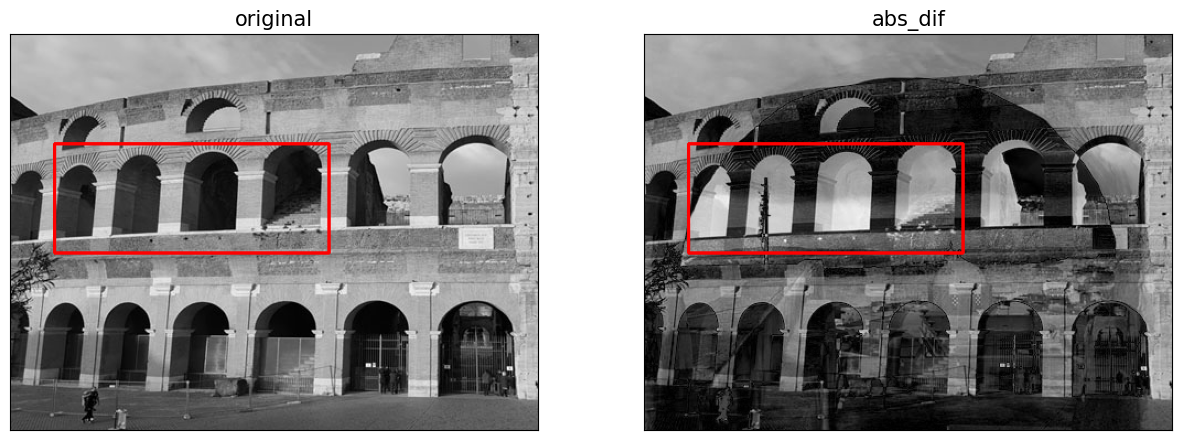

In [28]:
images_dict = {}

marked_image1 = image1.copy()
marked_image1 = cv2.cvtColor(marked_image1, cv2.COLOR_GRAY2BGR)
cv2.rectangle(marked_image1, (40, 100, 250, 100), (0, 0, 255), 2)

marked_abs_dif = abs_dif2.copy()
marked_abs_dif = cv2.cvtColor(marked_abs_dif, cv2.COLOR_GRAY2BGR)
cv2.rectangle(marked_abs_dif, (40, 100, 250, 100), (0, 0, 255), 2)

images_dict["original"] = marked_image1
images_dict["abs_dif"] = marked_abs_dif

show_images(images_dict, 15)

---